In [138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import re

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

from sklearn.ensemble import RandomForestClassifier

In [97]:
df = pd.read_csv("CreditScoreTrain.csv")

<ipython-input-97-1efa8bb7ac38>:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("CreditScoreTrain.csv")


In [98]:
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [100]:
df.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [101]:
# columns that should be int or float but are object
float_cols = ['Age', 'Annual_Income','Num_of_Loan', 'Num_of_Delayed_Payment',
              'Changed_Credit_Limit', 'Outstanding_Debt', 'Amount_invested_monthly',
              'Monthly_Balance']

In [102]:
# function that convert object to float
def to_float(series):
  new_series = []
  for x in series:
    try:
      new_series.append(float(x))
    except ValueError:
      new_series.append(np.nan)
  return pd.Series(new_series)

In [103]:
df[float_cols] = df[float_cols].apply(to_float)

In [104]:
pd.cut(df["Age"].values, 5).value_counts()

(-509.198, 1339.6]    93524
(1339.6, 3179.2]        387
(3179.2, 5018.8]        374
(5018.8, 6858.4]        399
(6858.4, 8698.0]        377
dtype: int64

In [105]:
# function that handles "Credit_History_Age" column to be able to take number of total months
def to_months(series):
  if pd.isnull(series):
    return None

  years_match = re.search(r"(\d+) Years", series)
  month_match = re.search(r"(\d+) Months", series)

  years = int(years_match.group(1) if years_match else 0)
  months = int(month_match.group(1) if month_match else 0)

  return years*12 + months

In [106]:
re_deneme = re.search(r"(\d+) Years", "22 Years")

In [107]:
re_deneme.group(0)

'22 Years'

In [108]:
re_deneme.group(1)

'22'

In [109]:
df["Credit_History_Age"] = df["Credit_History_Age"].apply(to_months)

In [110]:
df["Credit_History_Age"].head(5)

0    265.0
1      NaN
2    267.0
3    268.0
4    269.0
Name: Credit_History_Age, dtype: float64

In [111]:
#handle payment behaviour
match_gibberish = r"[@/#*$&^()]"

special_chars_in_payment_behaviour = df["Payment_Behaviour"].str.contains(match_gibberish, regex=True)
special_chars_in_payment_behaviour

0        False
1        False
2        False
3        False
4        False
         ...  
99995    False
99996    False
99997    False
99998    False
99999     True
Name: Payment_Behaviour, Length: 100000, dtype: bool

In [112]:
df.loc[special_chars_in_payment_behaviour, "Payment_Behaviour"]

5        !@9#%8
16       !@9#%8
32       !@9#%8
47       !@9#%8
54       !@9#%8
          ...  
99947    !@9#%8
99980    !@9#%8
99982    !@9#%8
99989    !@9#%8
99999    !@9#%8
Name: Payment_Behaviour, Length: 7600, dtype: object

In [113]:
# convert above rows to unknown
df.loc[special_chars_in_payment_behaviour, "Payment_Behaviour"] = "Unknown"

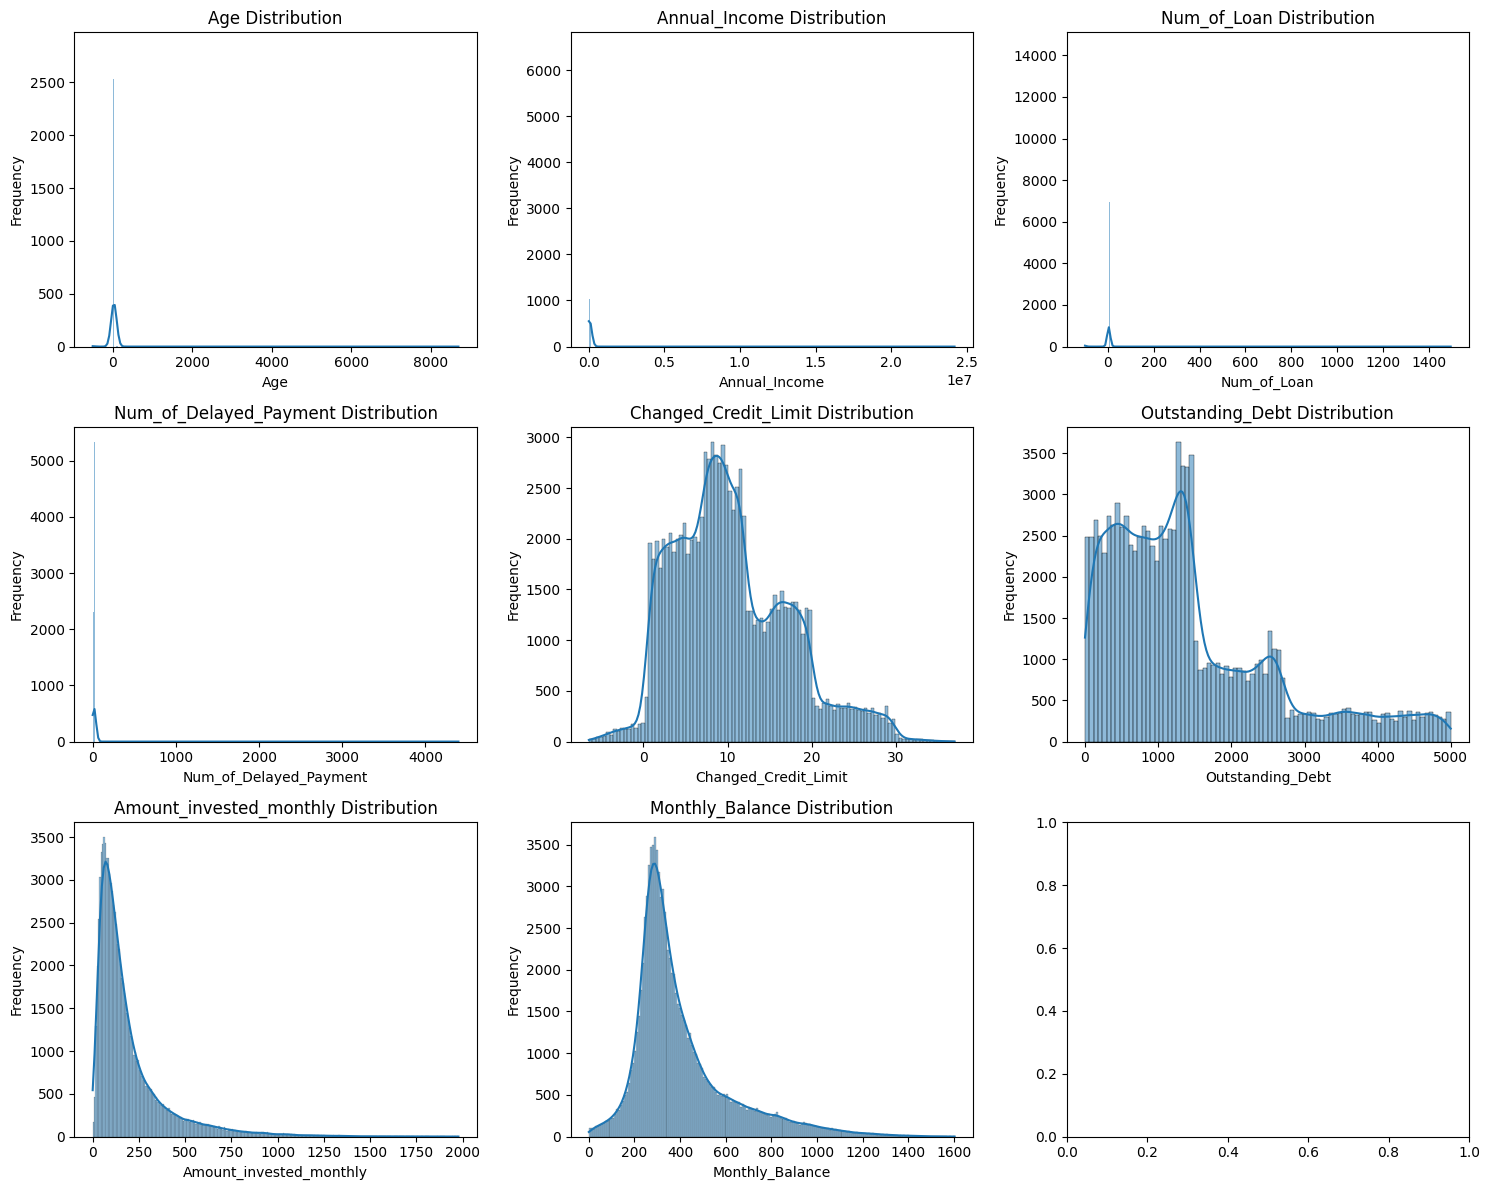

In [114]:
# quick check distribution of numeric columns by plotting
fig, axes = plt.subplots(len(float_cols)//3 + 1, 3, figsize=(15,12))
axes = axes.flatten()

for i, col in enumerate(float_cols):
  sns.histplot(data=df, x=col, ax=axes[i], kde=True)
  axes[i].set_title(f"{col} Distribution")
  axes[i].set_xlabel(col)
  axes[i].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

In [115]:
df.loc[df["Age"]<0, "Age"] = np.nan

In [122]:
selected_cat_cols = ['Credit_Score', 'Payment_Behaviour','Occupation', 'Month']

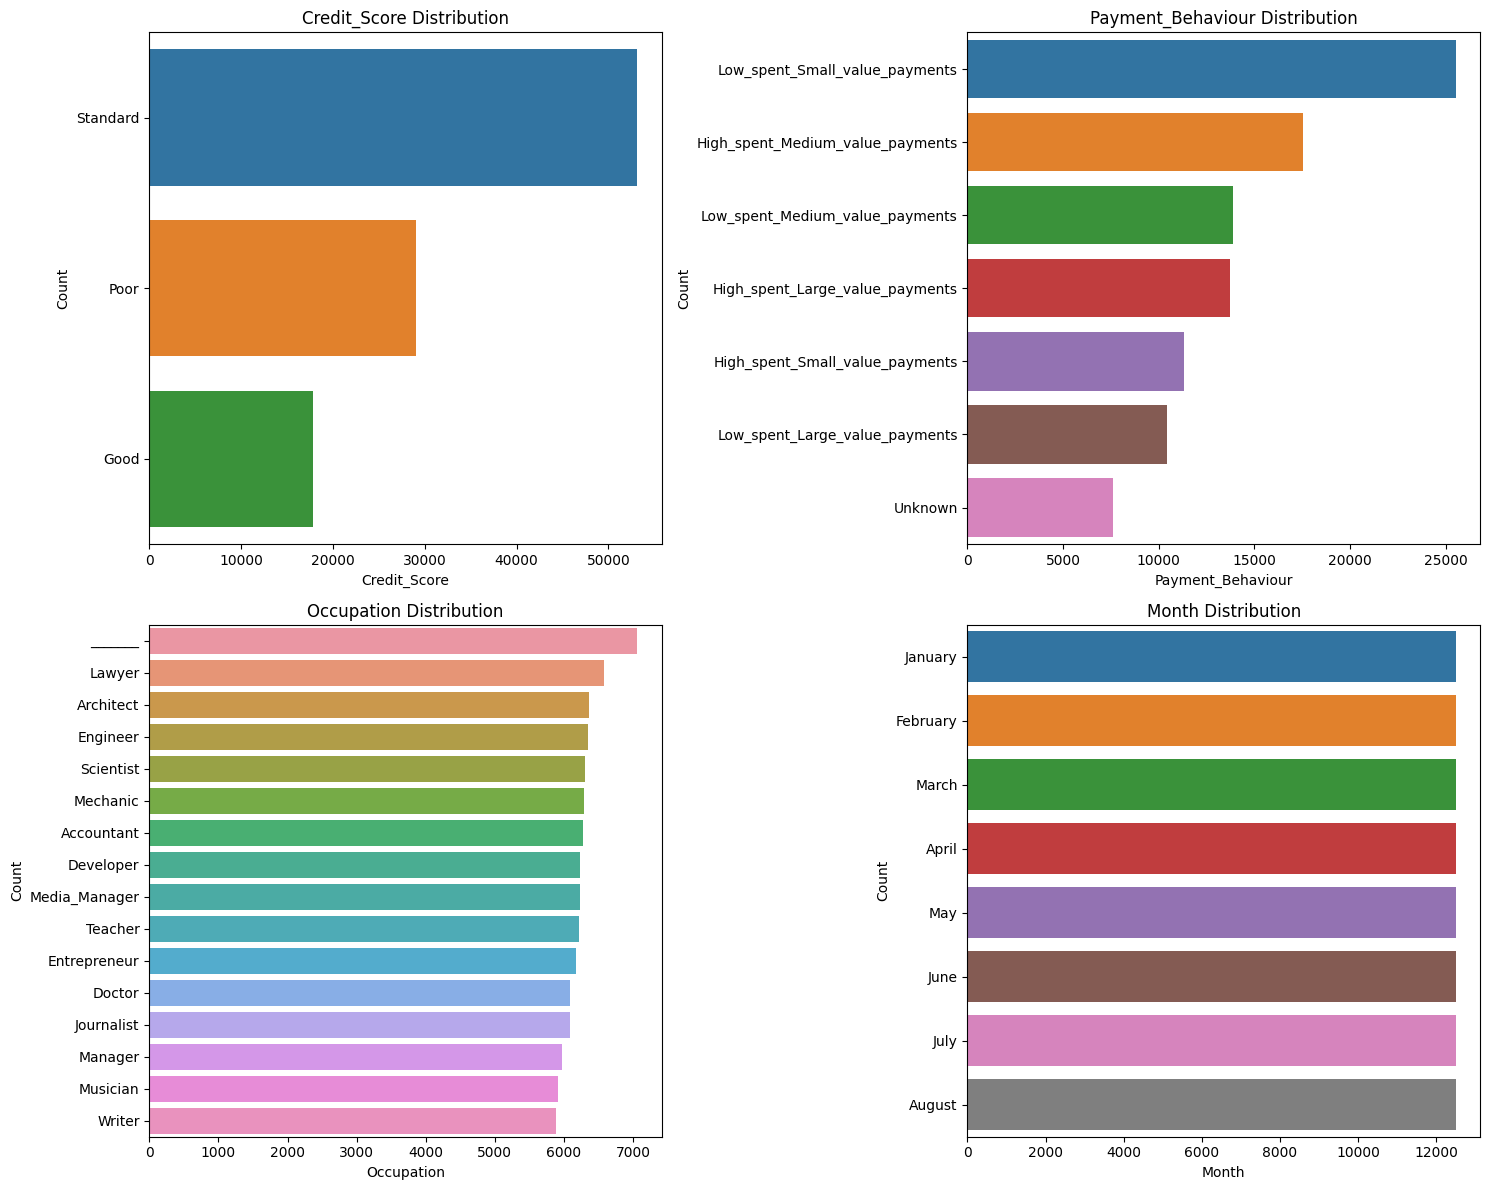

In [123]:
# quick check distribution of selected categorical columns by plotting
fig, axes = plt.subplots(len(selected_cat_cols)//2, 2, figsize=(15,12))
axes = axes.flatten()

for i, col in enumerate(selected_cat_cols):
  sns.countplot(data=df, y=col, ax=axes[i], order=df[col].value_counts().index)
  axes[i].set_title(f"{col} Distribution")
  axes[i].set_xlabel(col)
  axes[i].set_ylabel("Count")

plt.tight_layout()
plt.show()

In [127]:
val_counts = df['Payment_Behaviour'].value_counts(dropna=False, normalize=True) * 100
val_counts

Low_spent_Small_value_payments      25.513
High_spent_Medium_value_payments    17.540
Low_spent_Medium_value_payments     13.861
High_spent_Large_value_payments     13.721
High_spent_Small_value_payments     11.340
Low_spent_Large_value_payments      10.425
Unknown                              7.600
Name: Payment_Behaviour, dtype: float64

In [128]:
val_counts[val_counts<15].index

Index(['Low_spent_Medium_value_payments', 'High_spent_Large_value_payments',
       'High_spent_Small_value_payments', 'Low_spent_Large_value_payments',
       'Unknown'],
      dtype='object')

In [131]:
df.drop(["ID", "SSN", "Name","Customer_ID"], axis=1, inplace=True)

In [132]:
#we need to decrease rows number that has rarely in the data for categorical columns
#to be able to perform one hot encoder in a healthy way.
for col in df.select_dtypes(include="object").columns:
  val_counts = df[col].value_counts(dropna=False, normalize=True) * 100

  #%2
  to_replace = val_counts[val_counts<2].index
  if len(to_replace) > 0:
    print(f"{col} has {len(to_replace)} values less than 2%.")

  df[col] = df[col].replace(to_replace, "Other")


Type_of_Loan has 6260 values less than 2%.


In [134]:
numeric_transformer = Pipeline(steps = [
    ("imputer", SimpleImputer(strategy = "median")),
    ("scaler", StandardScaler())
])

category_transformer = Pipeline(steps = [
    ("imputer", SimpleImputer(strategy = "most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown = "infrequent_if_exist"))
])

In [135]:
categorical_cols = list(df.select_dtypes(include = "object").columns)

In [136]:
preprocessing_pipeline = ColumnTransformer(transformers = [
    ("numeric", numeric_transformer, float_cols),
    ("category", category_transformer, categorical_cols)
])
preprocessing_pipeline

ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['Age', 'Annual_Income', 'Num_of_Loan',
                                  'Num_of_Delayed_Payment',
                                  'Changed_Credit_Limit', 'Outstanding_Debt',
                                  'Amount_invested_monthly',
                                  'Monthly_Balance']),
                                ('category',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='infrequent_if_exist'))]),
                                 ['Month', 'Occupation', 'Type_of_Loan',
                                  'Credit_Mix', 'Payment_of_Min_Amount',
                                  'Payment_Behaviour', 'Credit_Score'])])

In [139]:
model_pipeline = Pipeline(steps = [
    ("preprocessing", preprocessing_pipeline),
    ("model", RandomForestClassifier())
])